# Correlation matrix and PCA

Test to perform the correlation matrix and the associated plots
Likewise do the PCA analysis.
Other statistical tools are tested.

In [17]:
using PyCall
using Distributions, Statistics, Distances , LinearAlgebra, StatsBase
using DataFrames
using Random , Printf, Glob
using MultivariateStats
import MultivariateStats


import PyPlot , CSV

sns= pyimport("seaborn")

rootdir = ENV["GAIA_ROOT"]

push!(LOAD_PATH,"$rootdir/master/src")
using GaiaClustering

## directory
wdir    = "$rootdir/products"
plotdir = "$rootdir/products/plots"
ocdir= "$wdir/oc2"

cd(wdir)

## Pearson's correlation

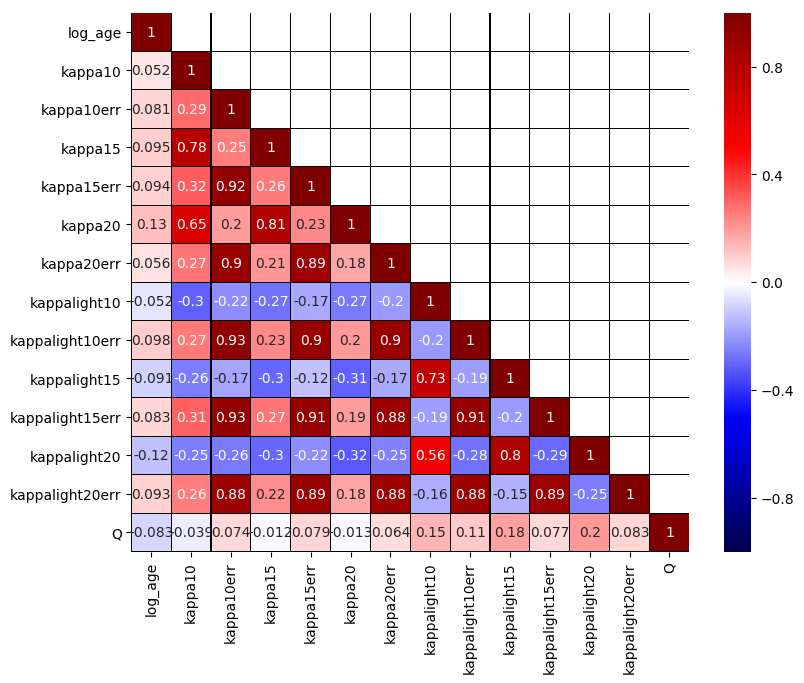

In [18]:
## reading the test file
df= CSV.read("votlist.finalSample_metric0.01-age.MS.csv", delim=";")
colname= names(df)

#data= rand(20,10)

## Pearson cor
data= convert(Matrix, df[:,3:end])     ## only relevant columns
p= Statistics.cor(data,dims=1)

pm=  UnitLowerTriangular(p)
tm= p .!= pm


## heatmap
fig= PyPlot.figure(figsize=(9,7))
heat_map = sns.heatmap(pm, vmin=-1, vmax=1, annot=true,mask= tm, cmap= "seismic",linewidths=0.1, 
    linecolor="black", xticklabels=colname[3:end], yticklabels=colname[3:end])
PyPlot.show()


## PCA analysis

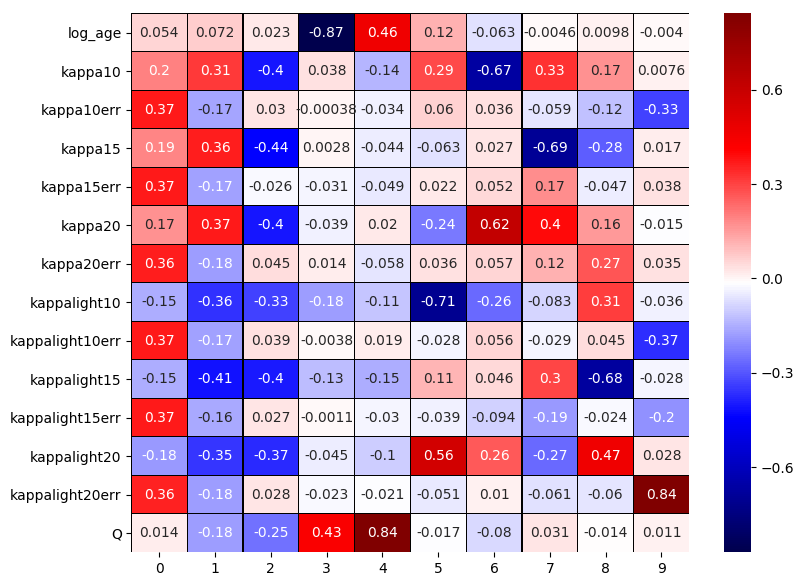

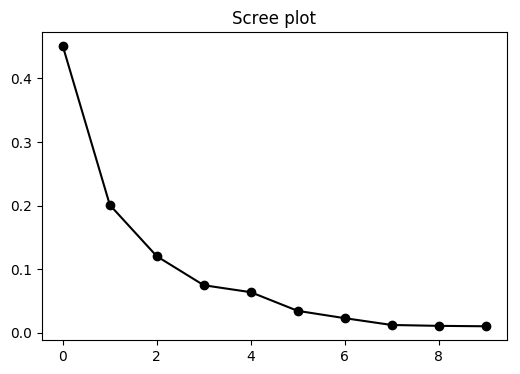

## Standardization...
###
(10, 403)
## dump...
PCA{Float64}
  mean: Array{Float64}((14,)) [-6.016692520549236e-15, -8.821176488460921e-16, -1.032534961859823e-15, 5.95057502032342e-16, -3.972559805234431e-16, 1.0363918160396622e-15, -1.6837923390841083e-15, -2.424308341613245e-17, -9.870791804545746e-16, 1.8072116728389645e-16, 3.5262666787101744e-16, -2.3581908413874293e-16, 1.5664337761832854e-15, 1.108294597535237e-15]
  proj: Array{Float64}((14, 10)) [0.05399681671646611 0.07213486062852813 … 0.009823448049704607 -0.003956707026322642; 0.19821593344487576 0.3139920910027154 … 0.17027432469320364 0.007625651927713556; … ; 0.36018015088476424 -0.18052266352090474 … -0.059732529013255986 0.8405537063977521; 0.01441329722673205 -0.17657525906024638 … -0.013559975559844109 0.010969421210440452]
  prinvars: Array{Float64}((10,)) [6.158016482149576, 2.7455642701583285, 1.6425458718466301, 1.0193855664242648, 0.8701897577112813, 0.4684872468042891, 0.3113915995661273, 0.1649329386692644, 0

In [24]:
d=copy(data')
println("## Standardization...")
dt= StatsBase.fit(ZScoreTransform, d)
d2= StatsBase.transform(dt, d)


println("###")
M = fit(PCA, d2; maxoutdim=10)  ## note transposition of data
# apply PCA model to testing set
Yte = transform(M, d2)
println(size(Yte))
Xr = reconstruct(M, Yte)


# println(M.proj) ## projection matrix

pvs= principalvars(M)
#println(pvs)

println("## dump...")
dump(M)

fig= PyPlot.figure(figsize=(9,7))
heat_map = sns.heatmap(M.proj, annot=true, cmap= "seismic",linewidths=0.1, 
    linecolor="black", yticklabels=colname[3:end])
PyPlot.show()

fig= PyPlot.figure(figsize=(6,4))
PyPlot.title("Scree plot")
PyPlot.plot(pvs ./ sum(pvs),"k-")
PyPlot.plot(pvs ./ sum(pvs),"ko")
PyPlot.show()


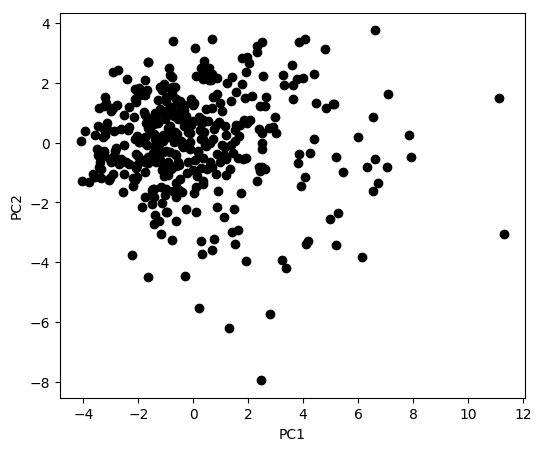

In [20]:
fig= PyPlot.figure(figsize=(6,5))
PyPlot.xlabel("PC1") 
PyPlot.ylabel("PC2") 
PyPlot.plot(Yte[1,:],Yte[2,:],"ko")
PyPlot.show()